<a href="https://colab.research.google.com/github/anavel898/signal-peptide-prediction/blob/main/SP_results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Result analysis:  
Analysis of sequences that are false positives and false negatives.  
The files containing TP, TN, FP, FN sequences and additional info are obtained using a python script offline.  
Some analyses are performed on results of both prediction methods, while others are method specific.  

### 1. **For both methods the following metrics are calculated:**
-   overall false positive rate (FPR)
- FPR of FP sequences that are endowed with a transmembrane helix in the 50 N terminal residues (TM FPR)
- FPR of FP sequences that are endowed with a transit peptide for transport into mitochondria, chloroplasts or peroxisomes (mitFPR, chlFPR, peroxFPR)
> This represents the false positives analysis, all other points are false negatives analysis.   
Comparison of these metrics will determine whether developed models have a propenisty to classify as positives sequences which have one of the above mentioned feaures in their N terminal region.

- distribution of FNs over kingdoms  
> This can be used to determine whether development of a kingdom-specific model is indicated compared to the current model which was developed for all eucaryotes.
  
### 2. **SVM-specific:**
- comparison of SP lenghts distributions - FNs vs TPs
> To determine whether a possible reason for the model missing some SPs is due to the fact that they are shorter then 20 residues (which is the optimal k of the model) and by choosing the 20-mer to encode for the model, too much noise is included
- comparison of residue distribution in the N terminal 20-mer of TPs vs FNs vs all positive sequences of the training dataset
> Possible explanation for the FNs could be a significantyl different residue distribution in the wrongly predicted sequences.

### 3. **von Heijne-specific:**
- sequence logo of the [-13,+2] motif of TPs vs FNs  
> This will show whether the cleavage site of the FNs is different then in TPs, possibly influencing the predictions.


## Loading the data

In [1]:
from google.colab import files

In [2]:
SVM_data = files.upload() # upload the SVM_benchmark_wpredictions.tsv

Saving SVM_benchmark_wpredictions.tsv to SVM_benchmark_wpredictions.tsv


In [3]:
VH_data = files.upload()  # upload the VH_benchmark_wpredictions.tsv

Saving VH_benchmark_wpredictions.tsv to VH_benchmark_wpredictions.tsv


In [4]:
import pandas as pd

In [5]:
SVMfullData = pd.read_csv('SVM_benchmark_wpredictions.tsv', delimiter='\t')
SVMfullData

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,Predicted-class
0,Q8TF40,Homo sapiens (Human),Metazoa,0,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
2,Q9BZS1,Homo sapiens (Human),Metazoa,0,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
...,...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,0,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1
7453,Q93Y07,Homo sapiens (Human),Metazoa,0,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1
7454,Q86TL2,Mus musculus (Mouse),Metazoa,0,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0


In [6]:
VHfullData=pd.read_csv('VH_benchmark_wpredictions.tsv', delimiter= '\t')
VHfullData.head(5)

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,Predicted-class
0,Q8TF40,Homo sapiens (Human),Metazoa,0,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
2,Q9BZS1,Homo sapiens (Human),Metazoa,0,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0


## Extracting TP, FP, TN and FN predictions

In [7]:
svmFPs = SVMfullData.loc[(SVMfullData['Class']== 0) & (SVMfullData['Predicted-class'] == 1)]
svmFNs = SVMfullData.loc[(SVMfullData['Class']== 1) & (SVMfullData['Predicted-class'] == 0)]
svmTNs = SVMfullData.loc[(SVMfullData['Class']== 0) & (SVMfullData['Predicted-class'] == 0)]
svmTPs = SVMfullData.loc[(SVMfullData['Class']== 1) & (SVMfullData['Predicted-class'] == 1)]

In [8]:
vhFPs = VHfullData.loc[(VHfullData['Class']== 0) & (VHfullData['Predicted-class'] == 1)]
vhFNs = VHfullData.loc[(VHfullData['Class']== 1) & (VHfullData['Predicted-class'] == 0)]
vhTNs = VHfullData.loc[(VHfullData['Class']== 0) & (VHfullData['Predicted-class'] == 0)]
vhTPs = VHfullData.loc[(VHfullData['Class']== 1) & (VHfullData['Predicted-class'] == 1)]

# False positive analysis

## Overall FPR

In [9]:
# getting the number of each type of predictions

svmFPnum = len(svmFPs)
svmFNnum = len(svmFNs)
svmTNnum = len(svmTNs)
svmTPnum = len(svmTPs)

vhTPnum = len(vhTPs)
vhFNnum = len(vhFNs)
vhTNnum = len(vhTNs)
vhFPnum = len(vhFPs)

In [10]:
# calculating the overall FPR
svmFPRtot = svmFPnum/(svmFPnum+svmTNnum)
print("Overall FPR of SVM predction is: "+str(round(svmFPRtot,4)))

vhFPRtot = vhFPnum/(vhFPnum+vhTNnum)
print("Overall FPR of von Heijne predction is: "+str(round(vhFPRtot,4)))

Overall FPR of SVM predction is: 0.0195
Overall FPR of von Heijne predction is: 0.0232


## Specific FPRs

In [ ]:
# extracting uniprot IDs of SVM FPs and TNs, so

with open('SvmFpIDS.txt', 'w') as f:
  for id in svmFPs['UniProtKB accession'].values:
    f.write(id+'\n')
  files.download('SvmFpIDS.txt')

with open('VHfpIDS.txt', 'w') as fl:
  for id in vhFPs['UniProtKB accession'].values:
    fl.write(id+'\n')
  files.download('VHfpIDS.txt')

with open('SVMtnIDs.txt','w') as f:
  for id in svmTNs['UniProtKB accession'].values:
    f.write(id+'\n')
  files.download('SVMtnIDs.txt')

with open('VHtnIDs.txt','w') as f:
  for id in vhTNs['UniProtKB accession'].values:
    f.write(id+'\n')
  files.download('VHtnIDs.txt')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded files are inputed into uniprot ID mapping tool. After mapping of the IDs, columns were customized to include Organism, Transmembrane and Transite peptide fields and downloaded in .tsv format.

In [11]:
# upload the files downloaded from uniprot
data = files.upload()

Saving SVM-TNs-idmapping.tsv to SVM-TNs-idmapping.tsv
Saving VH-TNs-idmapping.tsv to VH-TNs-idmapping.tsv
Saving SVM-FPs-idmapping.tsv to SVM-FPs-idmapping.tsv
Saving VH-FPs-idmapping.tsv to VH-FPs-idmapping.tsv


In [12]:
uniprotSVMfps = pd.read_csv('SVM-FPs-idmapping.tsv', delimiter="\t")
uniprotVHfps = pd.read_csv('VH-FPs-idmapping.tsv', delimiter="\t")
uniprotSVMtns = pd.read_csv('SVM-TNs-idmapping.tsv', delimiter='\t')
uniprotVHtns = pd.read_csv('VH-TNs-idmapping.tsv', delimiter='\t')

In [13]:
import re

In [14]:
def countTMs(df):
  '''Ccounts proteins that have a whole transmembrane domain located in the first 50 residues'''
  numOfTm = 0
  expresion = "\d+\.\.\d+"
  for item in df.itertuples():
    if str(item[4]) == "nan":
      continue
    else:
      r = re.search(expresion, str(item[4]))
      end = re.findall('\d+', r.group())[1]
      if int(end) <= 50:
        numOfTm +=1
  return numOfTm

def countTSs(df):
  #Sorts and counts proteins that have a transite peptide according to the subcellular localization they have
  mitochTP, chlorTP, peroxTP = 0,0,0
  for item in df.itertuples():
    if str(item[5]) == 'nan':
        continue
    else:
      x = re.findall("\"Mitochondrion\"|\"Chloroplast\"|\"Peroxisome\"|\"Chloroplast and mitochondrion\"", item[5])   #kad budes sredjivala kod probaj nekako elegantnije da napravis ovaj deo za chloroplast and mitochondrion
      if len(x) == 0:
        continue
      elif x[0][1:-1] == "Chloroplast and mitochondrion":
        mitochTP +=1
        chlorTP +=1
      elif x[0][1:-1] == "Mitochondrion":
        mitochTP +=1
      elif x[0][1:-1] == "Chloroplast":
        chlorTP +=1
      elif x[0][1:-1] == "Peroxisome":
        peroxTP +=1
  return mitochTP, chlorTP, peroxTP


#### For SVM predictor:

In [15]:
SVMfpsWithTM = countTMs(uniprotSVMfps)
print("TM and TS count in SVM  FPs:\n")
print("transmem:",SVMfpsWithTM)
SVMfpsTSMitoch, SVMfpsTSChlor, SVMfpsTSperox = countTSs(uniprotSVMfps)
print("mitoch:",SVMfpsTSMitoch,"\nchlor:",SVMfpsTSChlor,"\nperox:",SVMfpsTSperox)
SVMfpsTotalTS = SVMfpsTSMitoch + SVMfpsTSChlor + SVMfpsTSperox
print("total TS:",SVMfpsTotalTS)

TM and TS count in SVM  FPs:

transmem: 39
mitoch: 36 
chlor: 14 
perox: 0
total TS: 50


In [16]:
SVMtnsWithTM = countTMs(uniprotSVMtns)
print("TM and TS counts in SVM TNs:\n")
print("transmem:",SVMtnsWithTM)
SVMtnsTSMitoch, SVMtnsTSChlor, SVMtnsTSperox = countTSs(uniprotSVMtns)
print("mitoch:",SVMtnsTSMitoch,"\nchlor",SVMtnsTSChlor,"\nperox:",SVMtnsTSperox)
SVMtnsTotalTS = SVMtnsTSMitoch + SVMtnsTSChlor + SVMtnsTSperox
print("total TS:",SVMtnsTotalTS)

TM and TS counts in SVM TNs:

transmem: 103
mitoch: 758 
chlor 620 
perox: 5
total TS: 1383


In [17]:
#calculating all specific FPRs
print("Results for specific FPRs of SVM prediction:\n")
SVMfprTM = SVMfpsWithTM/(SVMfpsWithTM+SVMtnsWithTM)
print("TM FPR =",str(round(SVMfprTM,5)))
SVMfprMit = SVMfpsTSMitoch/(SVMfpsTSMitoch+SVMtnsWithTM)
print("FPR mitochondrial TS =",str(round(SVMfprMit,5)))
SVMfprChlor = SVMfpsTSChlor/(SVMfpsTSChlor+SVMtnsTSChlor)
print("FPR chloroplast TS =",str(round(SVMfprChlor,5)))
SVMfprPerox = SVMfpsTSperox/(SVMfpsTSperox+SVMtnsTSperox)
print("FPR peroxisomal TS =",str(round(SVMfprPerox,5)))
SVMfprTStotal = SVMfpsTotalTS/(SVMfpsTotalTS+SVMtnsTotalTS)
print("FPR total TS =",str(round(SVMfprTStotal,5)))

Results for specific FPRs of SVM prediction:

TM FPR = 0.27465
FPR mitochondrial TS = 0.25899
FPR chloroplast TS = 0.02208
FPR peroxisomal TS = 0.0
FPR total TS = 0.03489


#### For von Heije:



In [18]:
#doing the countings for FPs of von heijne
print("TM and TS count in von Heijne  FPs:\n")
VHfpsWithTM = countTMs(uniprotVHfps)
print("transmem:", VHfpsWithTM)
VHfpsTSMitoch, VHfpsTSChlor, VHfpsTSperox = countTSs(uniprotVHfps)
print("mitoch:",VHfpsTSMitoch,"\nchlor:",VHfpsTSChlor,"\nperox:",VHfpsTSperox)
VHfpsTotTS = VHfpsTSMitoch + VHfpsTSChlor + VHfpsTSperox
print("total TS:",VHfpsTotTS)

TM and TS count in von Heijne  FPs:

transmem: 40
mitoch: 29 
chlor: 25 
perox: 0
total TS: 54


In [19]:
#doing the counting for the TNs of von heijne
print("TM and TS count in von Heijne  TNs:\n")
VHtnsWithTM = countTMs(uniprotVHtns)
print("transmem:", VHtnsWithTM)
VHtnsTSMitoch, VHtnsTSChlor, VHtnsTSperox = countTSs(uniprotVHtns)
print("mitoch:",VHtnsTSMitoch,"\nchlor:",VHtnsTSChlor,"\nperox:",VHtnsTSperox)
VHtnsTotTS = VHtnsTSMitoch + VHtnsTSChlor + VHtnsTSperox
print("total TS:",VHtnsTotTS)

TM and TS count in von Heijne  TNs:

transmem: 102
mitoch: 765 
chlor: 609 
perox: 5
total TS: 1379


In [20]:
#calculating FPRs for different scenarios
print("Results for specific FPRs of von Heijne prediction:\n")
VHfprTM = VHfpsWithTM/(VHfpsWithTM+VHtnsWithTM)
print("TM FPR =",str(round(VHfprTM,5)))
VHfprMit = VHfpsTSMitoch/(VHfpsTSMitoch+VHtnsTSMitoch)
print("FPR mitochondrial TS =",str(round(VHfprMit,5)))
VHfprChlor = VHfpsTSChlor/(VHfpsTSChlor+VHtnsTSChlor)
print("FPR chloroplast TS =",str(round(VHfprChlor,5)))
VHfprPerox = VHfpsTSperox/(VHfpsTSperox+VHtnsTSperox)
print("FPR peroxisomal TS =",str(round(VHfprPerox,5)))
VHfprTStotal = VHfpsTotTS/(VHfpsTotTS+VHtnsTotTS)
print("FPR total TS =",str(round(VHfprTStotal,5)))

Results for specific FPRs of von Heijne prediction:

TM FPR = 0.28169
FPR mitochondrial TS = 0.03652
FPR chloroplast TS = 0.03943
FPR peroxisomal TS = 0.0
FPR total TS = 0.03768


# False negatives analysis


## Plotting the kingdoms distribution

In [21]:
import matplotlib.pyplot as plt

In [22]:
VHfnskingdomCounts = vhFNs.value_counts(subset="Kingdom")
VHfnskingdomCounts

Kingdom
Metazoa    43
Fungi       6
Plants      4
Other       1
dtype: int64

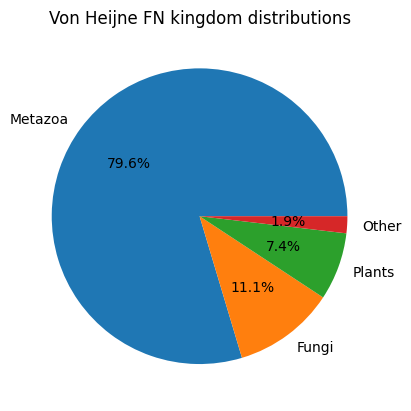

In [23]:
plt.pie(VHfnskingdomCounts, autopct='%1.1f%%', labels = ["Metazoa","Fungi", "Plants", "Other"])
plt.title("Von Heijne FN kingdom distributions")
plt.show()

In [24]:
SVMfnskingdomCounts = svmFNs.value_counts(subset="Kingdom")
SVMfnskingdomCounts

Kingdom
Metazoa    45
Plants      5
Fungi       3
dtype: int64

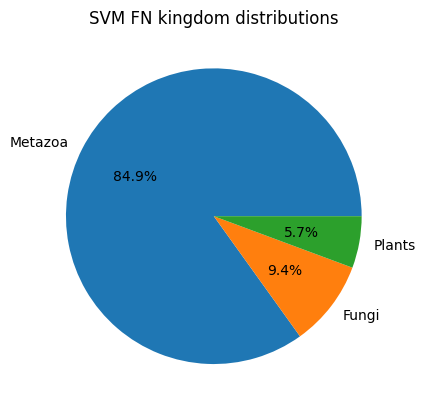

In [25]:
plt.pie(SVMfnskingdomCounts, autopct='%1.1f%%', labels = ["Metazoa","Fungi", "Plants"])
plt.title("SVM FN kingdom distributions")
plt.show()

## Plotting the length distribution of the signal peptides in SVM's TPs and FNs

In [44]:
def getLengths(df):
    listOfSPLengths = []
    for row in df.itertuples():
      lengthofSP = 0
      for char in row[6]:
        if char == 'S':
          lengthofSP += 1
        else:
          break
      listOfSPLengths.append(lengthofSP)
    return listOfSPLengths

In [39]:
svmFNs.dtypes

UniProtKB accession                        object
Taxa                                       object
Kingdom                                    object
Class                                       int64
Sequence (first 50 N-terminal residues)    object
SP cleavage-site annotation                object
Predicted-class                             int64
dtype: object

In [29]:
from statistics import mean, median

In [ ]:
svmFNs

In [46]:
SVMfnsSPLens = getLengths(svmFNs)
print(SVMfnsSPLens)
#print("\n")
print("Mean length of the signal peptide in FNs: " + str(round(mean(SVMfnsSPLens),5)))
print("Median length of the signal peptide in FNs: " + str(median(SVMfnsSPLens)))

[20, 31, 29, 30, 20, 40, 33, 41, 27, 32, 14, 16, 19, 30, 25, 45, 35, 22, 31, 26, 25, 24, 20, 42, 46, 22, 21, 15, 27, 20, 20, 21, 17, 40, 30, 28, 30, 17, 34, 31, 28, 38, 24, 21, 35, 32, 28, 15, 36, 30, 18, 21, 20]
Mean length of the signal peptide in FNs: 27.20755
Median length of the signal peptide in FNs: 27


In [47]:
import seaborn as sbn

<Axes: title={'center': 'Distribution of SP lengths in SVM FNs'}, xlabel='Length of the signal peptide', ylabel='%'>

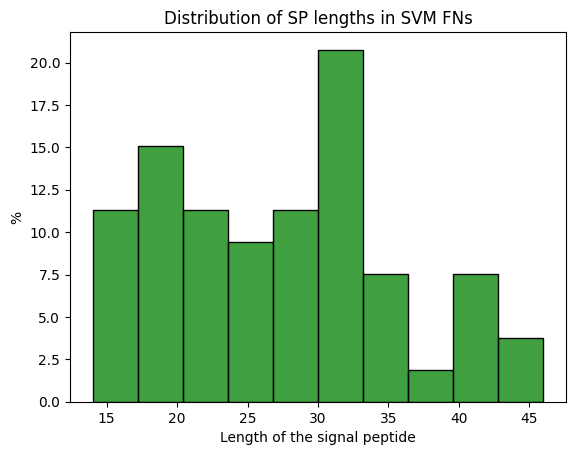

In [48]:
FNhist = sbn.histplot(SVMfnsSPLens, bins=10, stat='percent', color='green')
FNhist.set(xlabel="Length of the signal peptide", ylabel="%", title="Distribution of SP lengths in SVM FNs")
FNhist

In [49]:
SVMtpsSPLength = getLengths(svmTPs)
print(SVMtpsSPLength)
print("Mean length of the signal peptide in TPs: "+str(round(mean(SVMtpsSPLength),5)))
print("Median length of the signal peptide in TPs: "+str(median(SVMtpsSPLength)))

[16, 20, 26, 25, 16, 19, 18, 19, 20, 16, 23, 31, 18, 16, 29, 23, 19, 24, 28, 21, 19, 19, 18, 21, 18, 19, 32, 27, 25, 28, 22, 26, 25, 25, 19, 21, 32, 21, 16, 25, 20, 26, 26, 20, 25, 22, 19, 21, 31, 15, 25, 22, 22, 21, 29, 18, 16, 27, 24, 18, 21, 23, 22, 22, 23, 18, 15, 24, 26, 23, 18, 22, 39, 21, 17, 21, 32, 21, 21, 30, 42, 15, 35, 24, 26, 26, 25, 21, 26, 30, 25, 23, 21, 25, 18, 16, 31, 25, 26, 31, 24, 20, 26, 21, 26, 34, 24, 13, 23, 20, 24, 27, 22, 18, 21, 19, 23, 22, 30, 22, 27, 24, 29, 14, 20, 19, 25, 29, 25, 26, 29, 19, 21, 22, 21, 27, 21, 30, 18, 26, 24, 26, 27, 19, 21, 32, 23, 22, 17, 27, 23, 18, 33, 22, 26, 22]
Mean length of the signal peptide in TPs: 23.17308
Median length of the signal peptide in TPs: 22.5


<Axes: title={'center': 'Distribution of SP lengths in SVM TPs'}, xlabel='Length of the signal peptide', ylabel='%'>

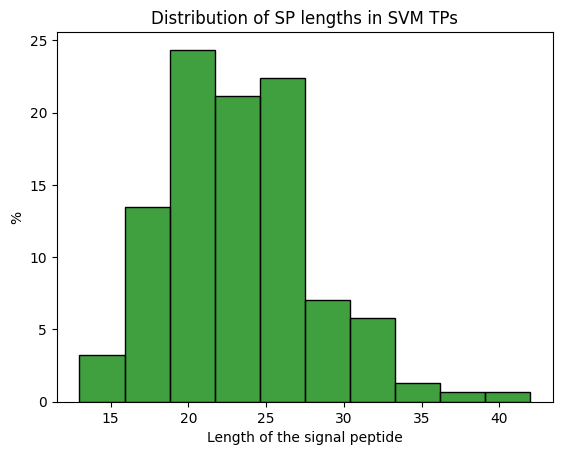

In [50]:
TPhist = sbn.histplot(SVMtpsSPLength, bins=10, stat='percent', color='green')
TPhist.set(xlabel="Length of the signal peptide", ylabel="%", title="Distribution of SP lengths in SVM TPs")
TPhist

## [-13,+2] motif sequence logo for Von Heijne TPs and FNs

In [ ]:
vhFNs.head()

,Kingdom,Class,Predicted-class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Metazoa,1,0,MISVGEIMERANHSLVRMRREGEDLTLEEKAEICSELELQQKYVDI...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Fungi,1,0,MKMFFTVLVTLFVCSMIIGICEGREIPVKCKGSKQCLQSCKEAGMT...,SSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNN...
2,Metazoa,1,0,MSRLYAIILIALVFNVIMTIMPDMKVEAVSCEDCPPHCATKDQRAK...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNN...
3,Metazoa,1,0,MAKHLIVMFLVIMVISSLVDCAKKPFVQRVKNAASKAYNKLKGLAM...,SSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Metazoa,1,0,MLLTISDFLFLSLTFSRYARMRDSRPWSDRKNNYSGPQFTYPPEKA...,SSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [51]:
def extractMotif(df, spLengths):
  to_align = []
  cut = " "
  for seq, length in zip(df["Sequence (first 50 N-terminal residues)"], spLengths):
    cut = seq[0:(length+2)]
    cut = cut[-15:]
    to_align.append(cut)
  aln = pd.DataFrame(to_align)
  return aln

In [52]:
VHmotifesFN = extractMotif(vhFNs ,getLengths(vhFNs))
with open('vhFNmotifs.txt', 'w') as f:
  for item in VHmotifesFN[0]:
    f.write(item+'\n')
files.download('vhFNmotifs.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
VHmotifesTP = extractMotif(vhTPs,getLengths(vhTPs))
with open('vhTPmotifs.txt', 'w') as f:
  for item in VHmotifesTP[0]:
    f.write(item+'\n')
files.download('vhTPmotifs.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Then using these 2 files I downloaded I create a sequence logo usig [https://weblogo.berkeley.edu/logo.cgi](https://)

## Comparing AA composition of the first 20 residues (the k used in the model traning)  
#### SVM FNs vs TPs vs all positives of the training set

In [54]:
def getAAfrequencies(df):
  tr_aa_count = {}
  numOfSequences = 0
  for seq in df["Sequence (first 50 N-terminal residues)"]:
    SPs = seq[0:20]
    for residue in SPs:
      if residue not in tr_aa_count:
        tr_aa_count[residue] = 1
      else:
        tr_aa_count[residue] += 1
    numOfSequences += 1
  tr_aa_freq = {}
  for key, value in tr_aa_count.items():
    tr_aa_freq[key] = tr_aa_count[key]/(numOfSequences*20)*100
  return tr_aa_freq

In [56]:
svmFNaaFreq = getAAfrequencies(svmFNs)
svmFNaaComp = pd.DataFrame.from_dict(svmFNaaFreq, orient='index', columns = ["FN"])
svmFNaaComp

,FN
M,6.792453
A,11.792453
R,9.056604
N,1.886792
I,4.433962
L,14.245283
T,4.811321
F,5.283019
V,6.226415
G,6.603774


In [58]:
svmTPaaFreq = getAAfrequencies(svmTPs)
svmTPaaComp = pd.DataFrame.from_dict(svmTPaaFreq, orient='index', columns = ["TP"])
svmTPaaComp

,TP
M,6.891026
L,23.461538
V,8.878205
I,4.967949
A,13.397436
S,5.897436
Q,1.923077
D,1.057692
P,3.044872
N,0.929487


In [59]:
trainingData = files.upload()

Saving training_set.tsv to training_set.tsv


In [60]:
trainingSet = pd.read_csv('training_set.tsv', delimiter = '\t')
trainingSet.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [61]:
#separating from the training set just the sequences which have the signal peptide
totalTRwithSP = trainingSet[trainingSet["Class"] == 'SP']
totalTRwithSP.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [62]:
totalTrainingAAFreq = getAAfrequencies(totalTRwithSP)
totalTrainingwithSP = pd.DataFrame.from_dict(totalTrainingAAFreq, orient='index', columns = ["Training positives"])
print(totalTrainingAAFreq)
totalTrainingwithSP

{'M': 7.015503875968992, 'R': 3.2364341085271318, 'F': 5.562015503875969, 'L': 23.91472868217054, 'A': 12.093023255813954, 'T': 4.476744186046512, 'S': 6.937984496124031, 'Q': 1.937984496124031, 'E': 1.550387596899225, 'G': 5.290697674418605, 'K': 2.616279069767442, 'V': 9.031007751937985, 'I': 4.4186046511627906, 'P': 3.3333333333333335, 'C': 2.5775193798449614, 'N': 0.9883720930232558, 'Y': 1.0077519379844961, 'W': 1.937984496124031, 'H': 1.0271317829457365, 'D': 1.0465116279069768}


,Training positives
M,7.015504
R,3.236434
F,5.562016
L,23.914729
A,12.093023
T,4.476744
S,6.937984
Q,1.937984
E,1.550388
G,5.290698


In [63]:
# merging all into a single data frame
svmTPaaComp["FN"] = svmFNaaComp["FN"]
svmTPaaComp["Training positives"] = totalTrainingwithSP["Training positives"]
svmTPaaComp["Residues"] = ['M','L','V','I','A','S','Q','D','P','N','H','F','C','Y','G','K','W','T','E','R']
svmTPaaComp

,TP,FN,Training positives,Residues
M,6.891026,6.792453,7.015504,M
L,23.461538,14.245283,23.914729,L
V,8.878205,6.226415,9.031008,V
I,4.967949,4.433962,4.418605,I
A,13.397436,11.792453,12.093023,A
S,5.897436,8.113208,6.937984,S
Q,1.923077,2.358491,1.937984,Q
D,1.057692,1.320755,1.046512,D
P,3.044872,6.037736,3.333333,P
N,0.929487,1.886792,0.988372,N


In [64]:
melted_aa_comp = svmTPaaComp.melt(id_vars = 'Residues', var_name = "Subset", value_name="Frequencies(%)")
melted_aa_comp

,Residues,Subset,Frequencies(%)
0,M,TP,6.891026
1,L,TP,23.461538
2,V,TP,8.878205
3,I,TP,4.967949
4,A,TP,13.397436
5,S,TP,5.897436
6,Q,TP,1.923077
7,D,TP,1.057692
8,P,TP,3.044872
9,N,TP,0.929487


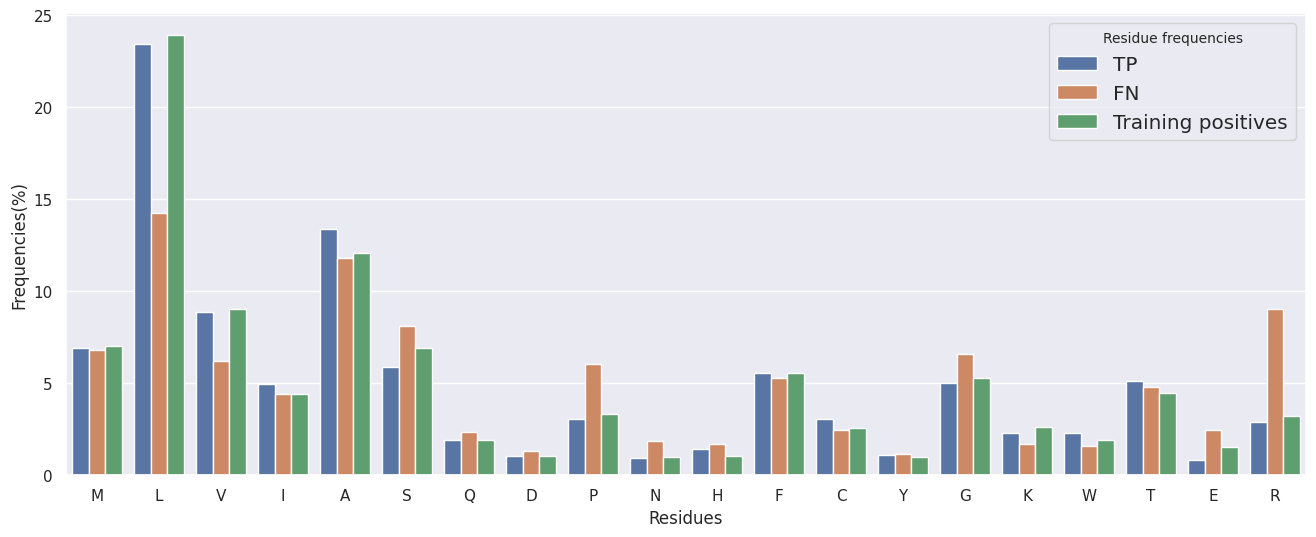

In [67]:
sbn.barplot(melted_aa_comp['Residues'], x=melted_aa_comp['Residues'], y = melted_aa_comp['Frequencies(%)'], hue = melted_aa_comp['Subset'])
plt.legend(title='Residue frequencies', fontsize = 'large', title_fontsize = "10")
sbn.set(rc={'figure.figsize':(16,6)})
plt.show()